# Import Necessary Modules

In [1]:
import pandas as pd
import scipy
import statsmodels.formula.api as smf
import seaborn as sns

# Import Data to Pandas

In [2]:
# set file path
# path = r'path to csv'
path = r'50Startups.csv'

In [3]:
data = pd.read_csv(path, sep=',')
# make sure sep is set correctly
# add list of name parameters if parsing error due to rows having too many cols

In [4]:
data = data.rename(columns={'R&D Spend': 'RandD', 'Administration': 'Admin', 'Marketing Spend': 'Marketing'})

In [5]:
data.dtypes

RandD        float64
Admin        float64
Marketing    float64
State         object
Profit       float64
dtype: object

In [6]:
# take a quick look to see if everything is okay
data.head()

,RandD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [7]:
# convert categorical variables to dummy vars
data = data.join(pd.get_dummies(data['State']))

In [8]:
# Now that dummy vars are set, drop 'State' column
data = data.drop(labels='State', axis=1)

In [20]:
data = data.rename(columns={'California': 'CA', 'New York': 'NY'})

In [21]:
data.head()

,RandD,Admin,Marketing,Profit,CA,NY
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [22]:
print(data.describe())

               RandD          Admin      Marketing         Profit         CA  \
count      50.000000      50.000000      50.000000      50.000000  50.000000   
mean    73721.615600  121344.639600  211025.097800  112012.639200   0.500000   
std     45902.256482   28017.802755  122290.310726   40306.180338   0.505076   
min         0.000000   51283.140000       0.000000   14681.400000   0.000000   
25%     39936.370000  103730.875000  129300.132500   90138.902500   0.000000   
50%     73051.080000  122699.795000  212716.240000  107978.190000   0.500000   
75%    101602.800000  144842.180000  299469.085000  139765.977500   1.000000   
max    165349.200000  182645.560000  471784.100000  192261.830000   1.000000   

              NY  
count  50.000000  
mean    0.500000  
std     0.505076  
min     0.000000  
25%     0.000000  
50%     0.500000  
75%     1.000000  
max     1.000000  


In [23]:
print(data.corr())

              RandD     Admin  Marketing    Profit        CA        NY
RandD      1.000000  0.241955   0.724248  0.972900 -0.072005  0.072005
Admin      0.241955  1.000000  -0.032154  0.200717 -0.175096  0.175096
Marketing  0.724248 -0.032154   1.000000  0.747766  0.049676 -0.049676
Profit     0.972900  0.200717   0.747766  1.000000 -0.042712  0.042712
CA        -0.072005 -0.175096   0.049676 -0.042712  1.000000 -1.000000
NY         0.072005  0.175096  -0.049676  0.042712 -1.000000  1.000000


# Model Data

## Use Backward Elimination with Sig Level <0.05

In [24]:
result = smf.ols(formula="""Profit ~ RandD + Admin + Marketing + NY""", data=data).fit()

In [25]:
print(result.summary(yname='Profit'))

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           7.53e-29
Time:                        11:18:53   Log-Likelihood:                -525.25
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.042e+04   6653.545      7.577      0.0

Administration has p-value of 0.651  
This does not meet criteria and is the highest p-value  
So it will be backed out and the model will be ran again

In [26]:
result2 = smf.ols(formula="""Profit ~ RandD + Marketing + NY""", data=data).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.44e-30
Time:                        11:50:42   Log-Likelihood:                -525.36
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.772e+04   3018.340     15.811      0.0

NY has p-value of 0.577  
This does not meet criteria and is the highest p-value  
So it will be backed out and the model will be ran again

In [27]:
result3 = smf.ols(formula="""Profit ~ RandD + Marketing""", data=data).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        11:51:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.0

Marketing has p-value of 0.060  
This does not meet criteria and is the highest p-value  
So it will be backed out and the model will be ran again

In [28]:
result4 = smf.ols(formula="""Profit ~ RandD""", data=data).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           3.50e-32
Time:                        11:58:21   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

Plot profit vs. marketing to demonstrate arbitray nature of this method.  
marketing does have a correlation with profit, but at a p-value 0f 0.060 it is smaller than our arbitrarily defined sig-level  
Should it really be excluded?

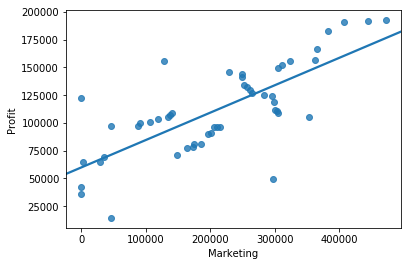

In [30]:
sns.regplot(data['Marketing'], data['Profit'], ci=0)

Adj R^2 or result 3 is better than Adj R^2 of result4.  
Might indicate that result3 is a better model than result4